In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.preprocessing import FunctionTransformer 
from sklearn.metrics import accuracy_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [6]:
df=pd.read_csv(r'C:\Users\SDS\Downloads\train.csv',usecols=['Survived',"Age",'Fare'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [16]:
print(df.isnull().sum())
df['Age'].fillna(df['Age'].mean(),inplace=True)

Survived    0
Age         0
Fare        0
dtype: int64


In [17]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_test

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417
...,...,...
433,17.000000,7.1250
773,29.699118,7.2250
25,38.000000,31.3875
84,17.000000,10.5000


C:\Users\SDS\AppData\Local\Temp\ipykernel_7352\4128331763.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


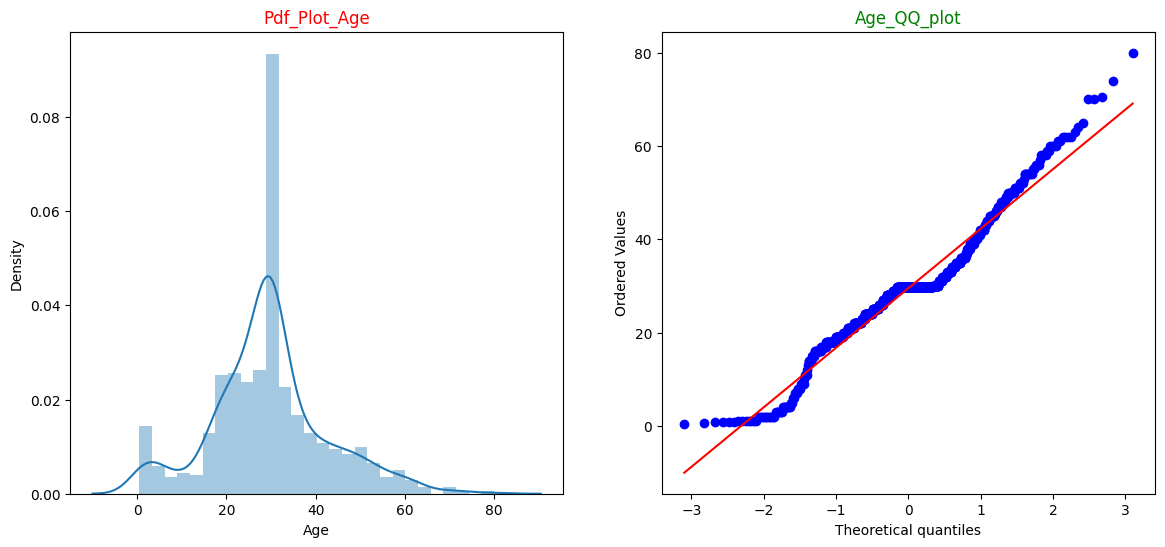

C:\Users\SDS\AppData\Local\Temp\ipykernel_7352\4128331763.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


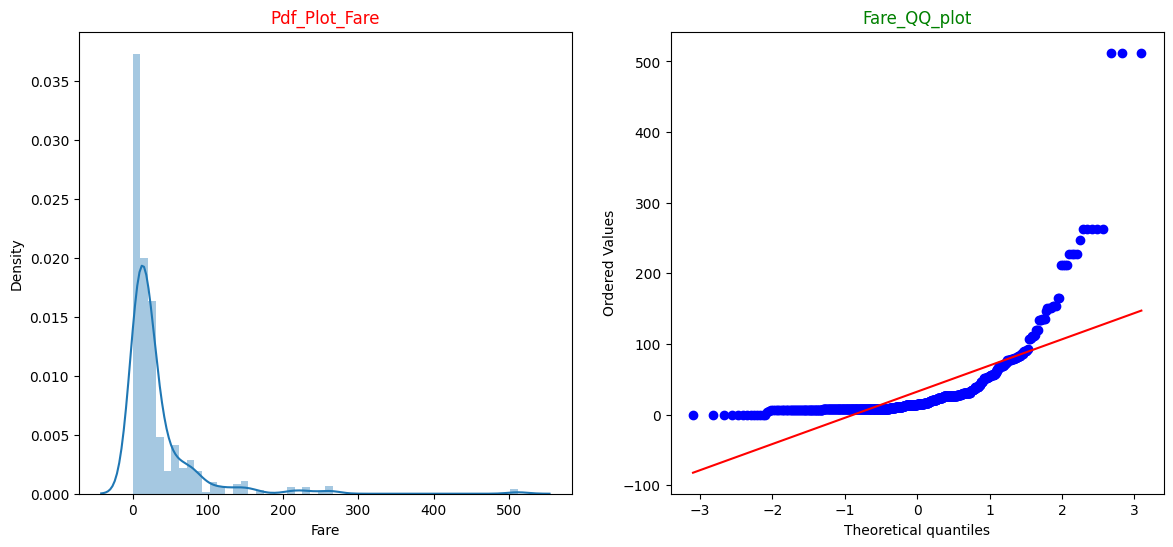

In [48]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Pdf_Plot_Age',color='red')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age_QQ_plot',color='green')
plt.show()
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Pdf_Plot_Fare',color='red')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare_QQ_plot',color='green')
plt.show()


In [34]:
ft=FunctionTransformer(np.log1p)
x_train_trans=ft.fit_transform(x_train)
x_test_trans=ft.transform(x_test)


In [36]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()

In [41]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('LogisticRegression_accuracy_score:-',accuracy_score(y_test,y_pred))
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
print('DecisionTreeClassifier_accuracy_score:-',accuracy_score(y_pred1,y_test))


LogisticRegression_accuracy_score:- 0.6480446927374302
DecisionTreeClassifier_accuracy_score:- 0.6759776536312849


In [44]:
lr.fit(x_train_trans,y_train)
y_pred2=lr.predict(x_test_trans)
print('after_function_tranform_logisticRegression_accuracy:-',accuracy_score(y_test,y_pred2))
dt.fit(x_train_trans,y_train)
y_pred3=dt.predict(x_test_trans)
print('after_tranform decission_tree accuracy_score:-',accuracy_score(y_test,y_pred))

after_function_tranform_logisticRegression_accuracy:- 0.6815642458100558
after_tranform decission_tree accuracy_score:- 0.6480446927374302


C:\Users\SDS\AppData\Local\Temp\ipykernel_7352\585754470.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trans['Age'])
C:\Users\SDS\AppData\Local\Temp\ipykernel_7352\585754470.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trans['Fare'])


<function matplotlib.pyplot.show(close=None, block=None)>

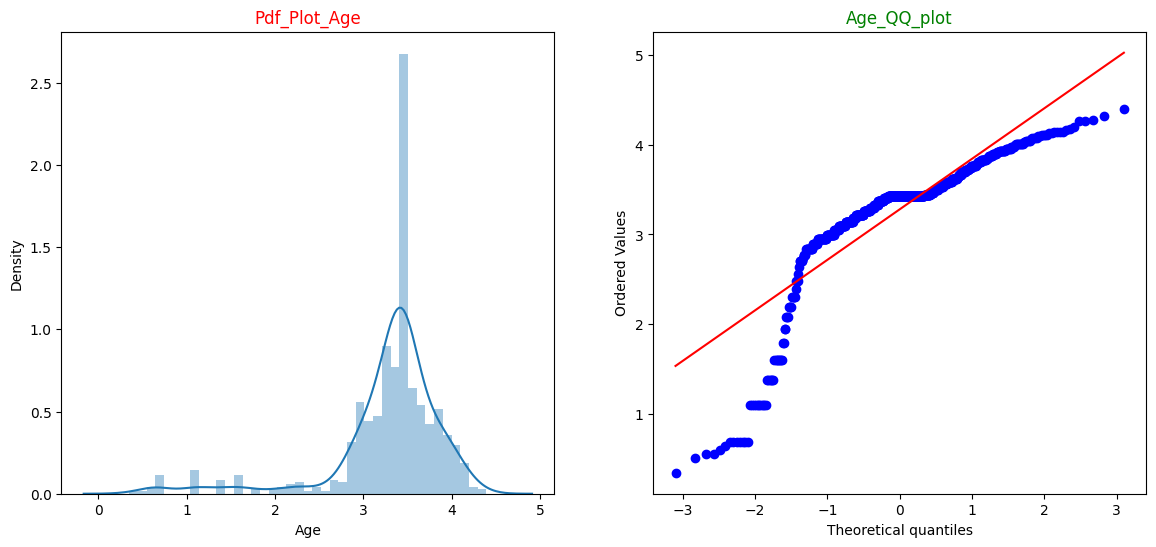

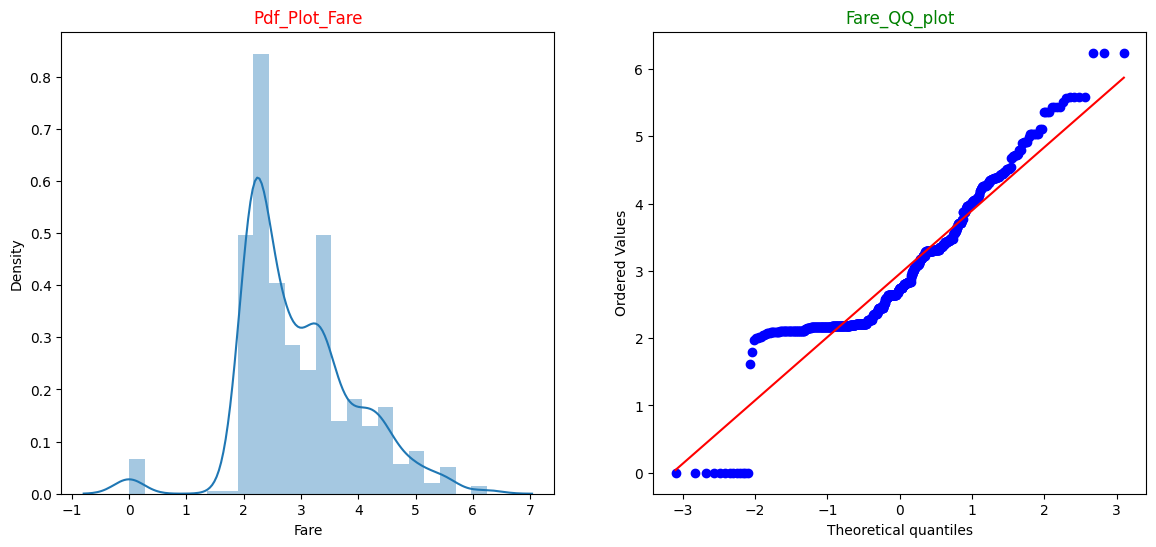

In [47]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(x_train_trans['Age'])
plt.title('Pdf_Plot_Age',color='red')

plt.subplot(122)
stats.probplot(x_train_trans['Age'],dist='norm',plot=plt)
plt.title('Age_QQ_plot',color='green')
plt.show
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(x_train_trans['Fare'])
plt.title('Pdf_Plot_Fare',color='red')

plt.subplot(122)
stats.probplot(x_train_trans['Fare'],dist='norm',plot=plt)
plt.title('Fare_QQ_plot',color='green')
plt.show